#SVM

This mini project focuses on implementing a support vector machine to separate and classify two different sets of points. The first dataset is linearly separable, and we will apply and graph the decision boundary produced by a linear SVM to the data. The second dataset is not linearly separable, and we will apply a kernel based SVM to classify and plot the resulting decision boundary.

##Part 1 - Linear SVM

The first part of this assignment implements a linear SVM on a linearly separable dataset. First, the dataset is read and plotted, showing the two different classes. Then, we use the data and corresponding labels to set up the SVM problem in terms of quadratic programming. Next, we use a quadratic programming solver to find the alpha values and manually find the support vector points. Finally, we calculate the W and b values using the found alphas and plot the resulting decision boundary and margin for the linear SVM.

**Dependencies**


This section contains all dependencies used for the rest of the code cells.

In [ ]:
!pip install pymatreader
!pip install cvxopt

In [ ]:
import matplotlib.pyplot as plt
import math
import mpmath as mp
from pymatreader import read_mat
import cvxopt
import cvxopt.solvers
from cvxopt import matrix
import numpy as np

**Data Preparation**

The code cell below downloads the linearly separable dataset from GitHub. The data points are then displayed to visualize the two classes.


In [ ]:
#Download data from github
!wget https://github.com/racs2019/A5ML/raw/main/myfile.mat

--2024-04-02 23:05:42--  https://github.com/racs2019/A5ML/raw/main/myfile.mat
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/racs2019/A5ML/main/myfile.mat [following]
--2024-04-02 23:05:42--  https://raw.githubusercontent.com/racs2019/A5ML/main/myfile.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 896 [application/octet-stream]
Saving to: ‘myfile.mat’

myfile.mat          100%[===================>]     896  --.-KB/s    in 0s      

2024-04-02 23:05:43 (40.1 MB/s) - ‘myfile.mat’ saved [896/896]



In [ ]:
#Read data from matlab workspace file
data = read_mat('myfile.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'x', 'y'])

In [ ]:
#Convert matlab data into separate train/test and label arrays
x_data = data['x']
y_data = data['y']

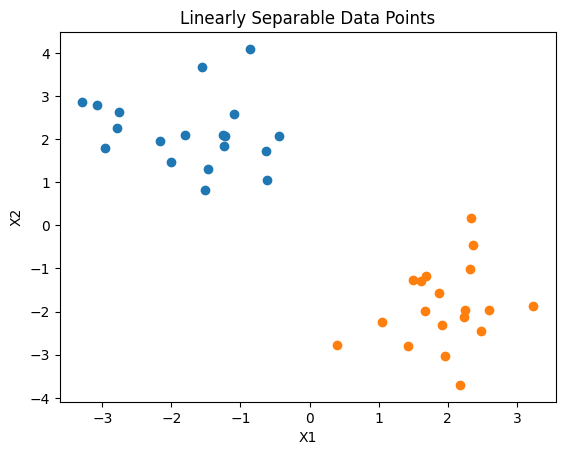

In [ ]:
#Plot the data
x_value = []
y_value = []

for i in range(40):
  x_value.append(x_data[i][0])
  y_value.append(x_data[i][1])

plt.scatter(x_value[0:19], y_value[0:19])
plt.scatter(x_value[20:39], y_value[20:39])

plt.title('Linearly Separable Data Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

**Quadratic Programming**

The code cells below use quadratic programming to find the alpha multipliers. First, the dataset and labels are used to set up the problem in the form of quadratic programming. Then, a solver is used to find the values for the alpha multipliers.

In [ ]:
# Set up values for quadratic programming solver
# Formatt of solver with respective variables:
# -----------------------------------------------
#  minimize  (1/2) * x^T * P * x + q^T * x
#  subject to  G * x <= h
#              A * x = b
#-------------------------------------------------
mp.mp.dps = 100

q = matrix(np.ones(40)*-1)
h = matrix((np.zeros(40)))
G = matrix(np.eye(40,40)*-1)
P = np.zeros((40,40))
b = matrix(0.0)
A = matrix(1.0, (1,40))
for i in range(40):
  A[i] = y_data[i]*1.0
#Initialize the matrix P using the data points and their respective labels
for i in range(40):
  for j in range(40):
    temp = mp.fdot(x_data[i], x_data[j])
    P[i][j] = y_data[i]*y_data[j]*temp
P = matrix(P)

In [ ]:
#Run the QP solver on the correctly formatted data
solution = cvxopt.solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -3.1176e+00 -5.1557e+00  9e+01  1e+01  2e+00
 1: -1.2428e+00 -7.5360e-01  1e+01  1e+00  2e-01
 2: -2.4063e-02 -4.7515e-01  5e-01  7e-16  1e-15
 3: -1.6470e-01 -2.3952e-01  7e-02  9e-17  6e-16
 4: -2.0198e-01 -2.3119e-01  3e-02  6e-17  3e-16
 5: -2.2569e-01 -2.2975e-01  4e-03  6e-17  4e-16
 6: -2.2907e-01 -2.2911e-01  4e-05  6e-17  3e-16
 7: -2.2910e-01 -2.2910e-01  4e-07  1e-17  3e-16
 8: -2.2910e-01 -2.2910e-01  4e-09  6e-17  3e-16
Optimal solution found.


In [ ]:
#Print all alpha values and find the indexes of the nonzero values (SVs)
alphas = solution['x']
print(alphas)  #SVs are index 2, 25, 26

[ 7.92e-11]
[ 3.27e-10]
[ 2.29e-01]
[ 5.54e-11]
[ 6.63e-11]
[ 1.21e-10]
[ 4.85e-11]
[ 9.63e-11]
[ 1.56e-10]
[ 4.48e-11]
[ 6.32e-11]
[ 1.40e-10]
[ 1.09e-10]
[ 1.73e-10]
[ 3.53e-10]
[ 2.36e-10]
[ 6.01e-11]
[ 1.35e-10]
[ 8.41e-11]
[ 1.37e-10]
[ 4.62e-10]
[ 1.30e-10]
[ 3.39e-10]
[ 7.00e-11]
[ 9.78e-11]
[ 5.79e-02]
[ 1.71e-01]
[ 2.39e-10]
[ 9.11e-11]
[ 1.02e-10]
[ 1.40e-10]
[ 2.14e-10]
[ 2.19e-10]
[ 5.10e-10]
[ 4.91e-10]
[ 4.50e-10]
[ 1.22e-10]
[ 7.58e-11]
[ 1.61e-10]
[ 2.18e-10]



**Plotting the Classifying line**

The following code cells compute W and b using the alphas found in the previous section, and then plot the linear classifying line and margin, as well as highlight the support vectors as red points.

In [ ]:
#Compute W by summing across all data points multiplied by their respective label and alpha value
W = y_data[0]*alphas[0]*x_data[0]
for i in range(39):
  W = W + y_data[i+1]*alphas[i+1]*x_data[i+1]

In [ ]:
#Compute beta: b = y[sv] - w*x[sv]
b = y_data[2] - np.dot(np.transpose(W), x_data[2])

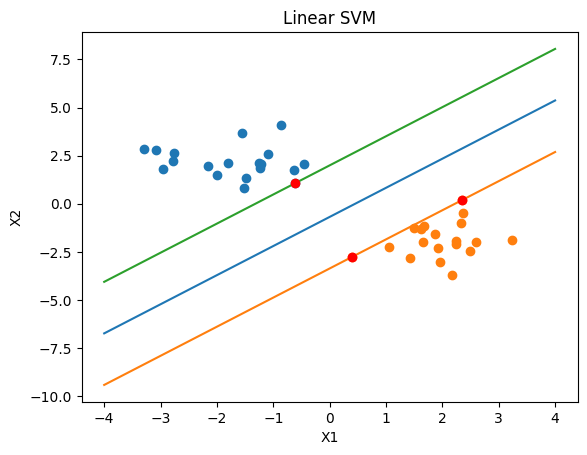

In [ ]:
#Uniformly generate x points
x = np.linspace(-4, 4, 100)

#Use the W and b found to calculate the second coordinate given a random input
#This first equation plots the svm line where the output is 0
y = -(x*W[0] + b)/W[1]

plt.plot(x, y)
plt.scatter(x_value[0:19], y_value[0:19])
plt.scatter(x_value[20:39], y_value[20:39])

#This second equation plots the svm line where the output is 1
x = np.linspace(-4, 4, 100)
y = -(x*W[0] + b-1)/W[1]
plt.plot(x, y)

#This second equation plots the svm line where the output is -1
x = np.linspace(-4, 4, 100)
y = -(x*W[0] + b+1)/W[1]
plt.plot(x, y)

#Plot the support vectors found from the maximum alpha values
plt.plot(x_value[2], y_value[2],'ro')
plt.plot(x_value[25], y_value[25],'ro')
plt.plot(x_value[26], y_value[26],'ro')

plt.title('Linear SVM')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

##Part 2 - Kernel Based SVM

The second part of this assignment implements a kernel based SVM on a non-linearly separable dataset. First, the dataset is read and plotted, showing the two different classes. Then, we use the data and corresponding labels to set up the SVM problem in terms of quadratic programming with a kernel function. Next, we use a quadratic programming solver to find the alpha values and manually find the support vector points. Finally, we calculate b using the alphas, kernel function, and the datapoints/labels, and show the resulting separating curve. We cannot find W directly due to our kernel function, so to plot the separating curve we created a large grid of points and used the alphas and b values to classify each point, with the resulting colormap showing the separating curve.

**Data Preparation**

The code cell below downloads the non-linearly separable dataset from GitHub. The data points are then displayed to visualize the two classes.

In [ ]:
#Download data from github
!wget https://github.com/racs2019/A5ML/raw/main/nonlinear.mat

--2024-04-02 23:06:06--  https://github.com/racs2019/A5ML/raw/main/nonlinear.mat
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/racs2019/A5ML/main/nonlinear.mat [following]
--2024-04-02 23:06:06--  https://raw.githubusercontent.com/racs2019/A5ML/main/nonlinear.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1216 (1.2K) [application/octet-stream]
Saving to: ‘nonlinear.mat.1’

nonlinear.mat.1     100%[===================>]   1.19K  --.-KB/s    in 0s      

2024-04-02 23:06:06 (49.6 MB/s) - ‘nonlinear.mat.1’ saved [1216/1216]



In [ ]:
#Read data from matlab workspace file
data = read_mat('nonlinear.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'x', 'y'])

In [ ]:
#Convert matlab data into x and y arrays
x_data = data['x']
y_data = data['y']

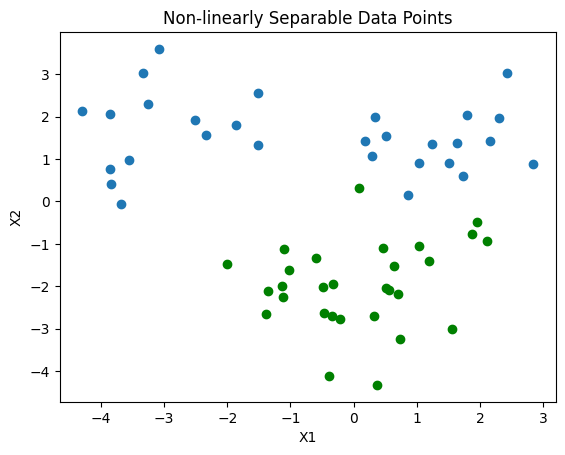

In [ ]:
#Plot the data
x_value = []
y_value = []

for i in range(60):
  x_value.append(x_data[i][0])
  y_value.append(x_data[i][1])

plt.scatter(x_value[0:29], y_value[0:29])
plt.scatter(x_value[30:59], y_value[30:59], c='green')

plt.title('Non-linearly Separable Data Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

**Quadratic Programming**

The code cells below use quadratic programming to find the alpha multipliers. First, the dataset and labels are used to set up the problem in the form of quadratic programming. A kernel function is defined to help set up the QP matrices. Then, a solver is used to find the values for the alpha multipliers.


In [ ]:
#Function to define the kernel to project data to higher dimensional space
def kernel(x1, x2):
  return (1 + np.dot(x1, np.transpose(x2)))**3

In [ ]:
# Set up values for quadratic programming solver
# Formatt of solver with respective variables:
# -----------------------------------------------
#  minimize  (1/2) * x^T * P * x + q^T * x
#  subject to  G * x <= h
#              A * x = b
#-------------------------------------------------
mp.mp.dps = 100

q = matrix(np.ones(60)*-1)
h = matrix(np.zeros(60))
G = matrix(np.eye(60,60)*-1)
P = np.zeros((60,60))
b = matrix(0.0)
A = matrix(1.0, (1,60))
for i in range(60):
  A[i] = y_data[i]*1.0
#Initialize the matrix P using the data points and their respective labels
for i in range(60):
  for j in range(60):
    temp = kernel(x_data[i], x_data[j])
    P[i][j] = y_data[i]*y_data[j]*temp
P = matrix(P)

In [ ]:
#Run the QP solver on the correctly formatted data
solution = cvxopt.solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -6.0793e+00 -1.3579e+01  2e+02  1e+01  2e+00
 1: -1.5100e+01 -1.7593e+01  9e+01  5e+00  1e+00
 2: -5.4962e+01 -5.3023e+01  9e+01  4e+00  9e-01
 3: -1.2174e+02 -9.0384e+01  9e+01  3e+00  7e-01
 4: -2.4361e+01 -1.7215e+01  7e+01  1e+00  3e-01
 5: -1.2523e+01 -8.5386e+00  3e+01  5e-01  1e-01
 6: -5.1200e+00 -3.7772e+00  2e+01  2e-01  4e-02
 7: -2.8857e+00 -2.3668e+00  9e+00  9e-02  2e-02
 8: -1.5889e+00 -1.5702e+00  2e+00  2e-02  4e-03
 9: -1.0766e+00 -1.3863e+00  7e-01  3e-03  7e-04
10: -1.1845e+00 -1.3142e+00  2e-01  1e-03  2e-04
11: -1.2237e+00 -1.2933e+00  7e-02  2e-16  6e-15
12: -1.2722e+00 -1.2762e+00  4e-03  3e-16  9e-15
13: -1.2751e+00 -1.2752e+00  1e-04  6e-16  7e-15
14: -1.2752e+00 -1.2752e+00  3e-06  5e-16  8e-15
15: -1.2752e+00 -1.2752e+00  4e-08  5e-16  9e-15
Optimal solution found.


In [ ]:
#Print all alpha values and find the indexes of the nonzero values (SVs)
alphas = solution['x']
print(alphas)  #SVs are index 5, 9, 23, 42, 54

[ 2.31e-12]
[ 1.62e-12]
[ 8.13e-12]
[ 6.57e-12]
[ 3.31e-12]
[ 2.17e-01]
[ 7.24e-11]
[ 6.67e-13]
[ 3.85e-12]
[ 1.05e+00]
[ 1.10e-12]
[ 4.58e-12]
[ 8.83e-12]
[ 2.03e-12]
[ 1.41e-12]
[ 5.32e-12]
[ 7.27e-12]
[ 8.28e-13]
[ 4.45e-13]
[ 5.80e-13]
[ 5.75e-13]
[ 8.72e-13]
[ 2.44e-12]
[ 6.27e-03]
[ 1.10e-12]
[ 8.62e-13]
[ 8.71e-13]
[ 4.23e-12]
[ 6.21e-13]
[ 5.46e-13]
[ 2.23e-10]
[ 8.22e-12]
[ 1.04e-11]
[ 6.59e-12]
[ 7.34e-10]
[ 1.81e-09]
[ 3.65e-11]
[ 2.22e-11]
[ 2.23e-10]
[ 3.87e-11]
[ 3.03e-12]
[ 2.23e-11]
[ 1.32e-01]
[ 4.36e-11]
[ 1.53e-11]
[ 1.65e-10]
[ 1.06e-09]
[ 1.14e-10]
[ 1.44e-11]
[ 6.13e-10]
[ 4.83e-11]
[ 1.00e-09]
[ 3.68e-11]
[ 1.33e-09]
[ 1.14e+00]
[ 2.31e-07]
[ 7.62e-10]
[ 1.44e-10]
[ 6.04e-10]
[ 4.63e-12]



**Plotting the Classifying line**

The following code cells compute b using the alphas found in the previous section, and then show the classifying curve, as well as highlight the support vectors as red points.

In [ ]:
#Compute b using the kernal and summing across all data points
sum = 0
for i in range(60):
  sum = sum + alphas[i]*y_data[i]*kernel(x_data[i], x_data[9])
b = y_data[9] - sum

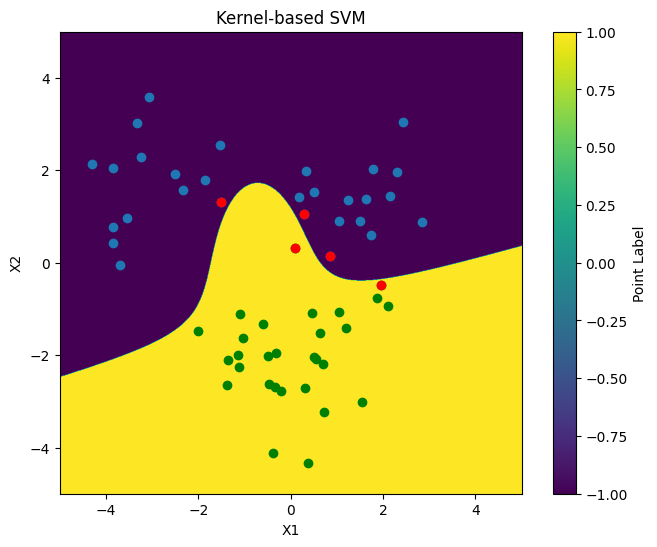

In [ ]:
#Function used to predict the output (-1,1,0) given two coordinates
def predict_values(x, y):
    z = [[] for _ in range(1000)]
    for i in range(len(x)):
      for j in range(len(y)):
        sum = 0
        for k in range(60):
          sum = sum + alphas[k]*y_data[k]*kernel(x_data[k], [x[i][j], y[i][j]])
        z[i].append(math.copysign(1, sum+b))
    return(z)

#Create a grid of input coordinates with specific range and density
density = 1000
x_min, x_max = -5, 5
y_min, y_max = -5, 5
x = np.linspace(x_min, x_max, density)
y = np.linspace(y_min, y_max, density)
X, Y = np.meshgrid(x, y)

#Calculate the output values for each input coordinate in the grid
Z = predict_values(X, Y)

#Plot the colormap to show the separating line
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin='lower', cmap='viridis')
plt.colorbar(label='Point Label')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Kernel-based SVM')
plt.grid(False)
plt.scatter(x_value[0:29], y_value[0:29])
plt.scatter(x_value[30:59], y_value[30:59], c='green')

#Plot SVs
plt.plot(x_value[5], y_value[5],'ro')
plt.plot(x_value[9], y_value[9],'ro')
plt.plot(x_value[23], y_value[23],'ro')
plt.plot(x_value[42], y_value[42],'ro')
plt.plot(x_value[54], y_value[54],'ro')
plt.show()